In [3]:
import sys
import os
import pickle

library_path = os.path.join('..', '..', 'UCB-USACE-LSTMs')
sys.path.insert(0, library_path)

from pathlib import Path
import pandas as pd

import matplotlib.pyplot as plt
import torch
from neuralhydrology.evaluation.metrics import *
from neuralhydrology.nh_run import start_run, eval_run, finetune
from neuralhydrology.utils.nh_results_ensemble import create_results_ensemble
from neuralhydrology.UCB_training.UCB_train import UCB_trainer
from neuralhydrology.evaluation.metrics import calculate_all_metrics

Quick check that working directory and train basin file exists:

In [2]:
print("Current Working Directory:", os.getcwd())
print("Train Basin File Exists:", os.path.exists("guerneville"))

Current Working Directory: /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/guerneville_all
Train Basin File Exists: True


Train NON physics informed LSTM:

In [ ]:
#adjust path to directory of daily csv
path_to_csv = Path("/Users/mia/research/russian_river_data_folder/")
#adjust path to yaml file for relevant basin
path_to_yaml = Path("guerneville_gage.yaml")
params = {
    "epochs":32
}
lstmNoPhysics = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params)

In [4]:
lstmNoPhysics.train()

2024-11-30 09:29:41,539: Logging to /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/guerneville_all/runs/testing_run_3011_092941/output.log initialized.
2024-11-30 09:29:41,545: ### Folder structure created at /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/guerneville_all/runs/testing_run_3011_092941
2024-11-30 09:29:41,553: ### Run configurations for testing_run
2024-11-30 09:29:41,556: experiment_name: testing_run
2024-11-30 09:29:41,569: train_basin_file: guerneville
2024-11-30 09:29:41,571: validation_basin_file: guerneville
2024-11-30 09:29:41,574: test_basin_file: guerneville
2024-11-30 09:29:41,575: train_start_date: 1994-10-01 00:00:00
2024-11-30 09:29:41,579: train_end_date: 2002-09-30 00:00:00
2024-11-30 09:29:41,583: validation_start_date: 2002-10-01 00:00:00
2024-11-30 09:29:41,585: validation_end_date: 2005-09-30 00:00:00
2024-11-30 09:29:41,588: test_start_date: 2005-10-01 00:00:00
2024-11-30 09:29:41,591: test_end_date: 2009-09-30 00:00:00
2024-11-30 09:29:41,59

Using basin: Guerneville
Using target variable: NR GUERNEVILLE FLOW COE GRN


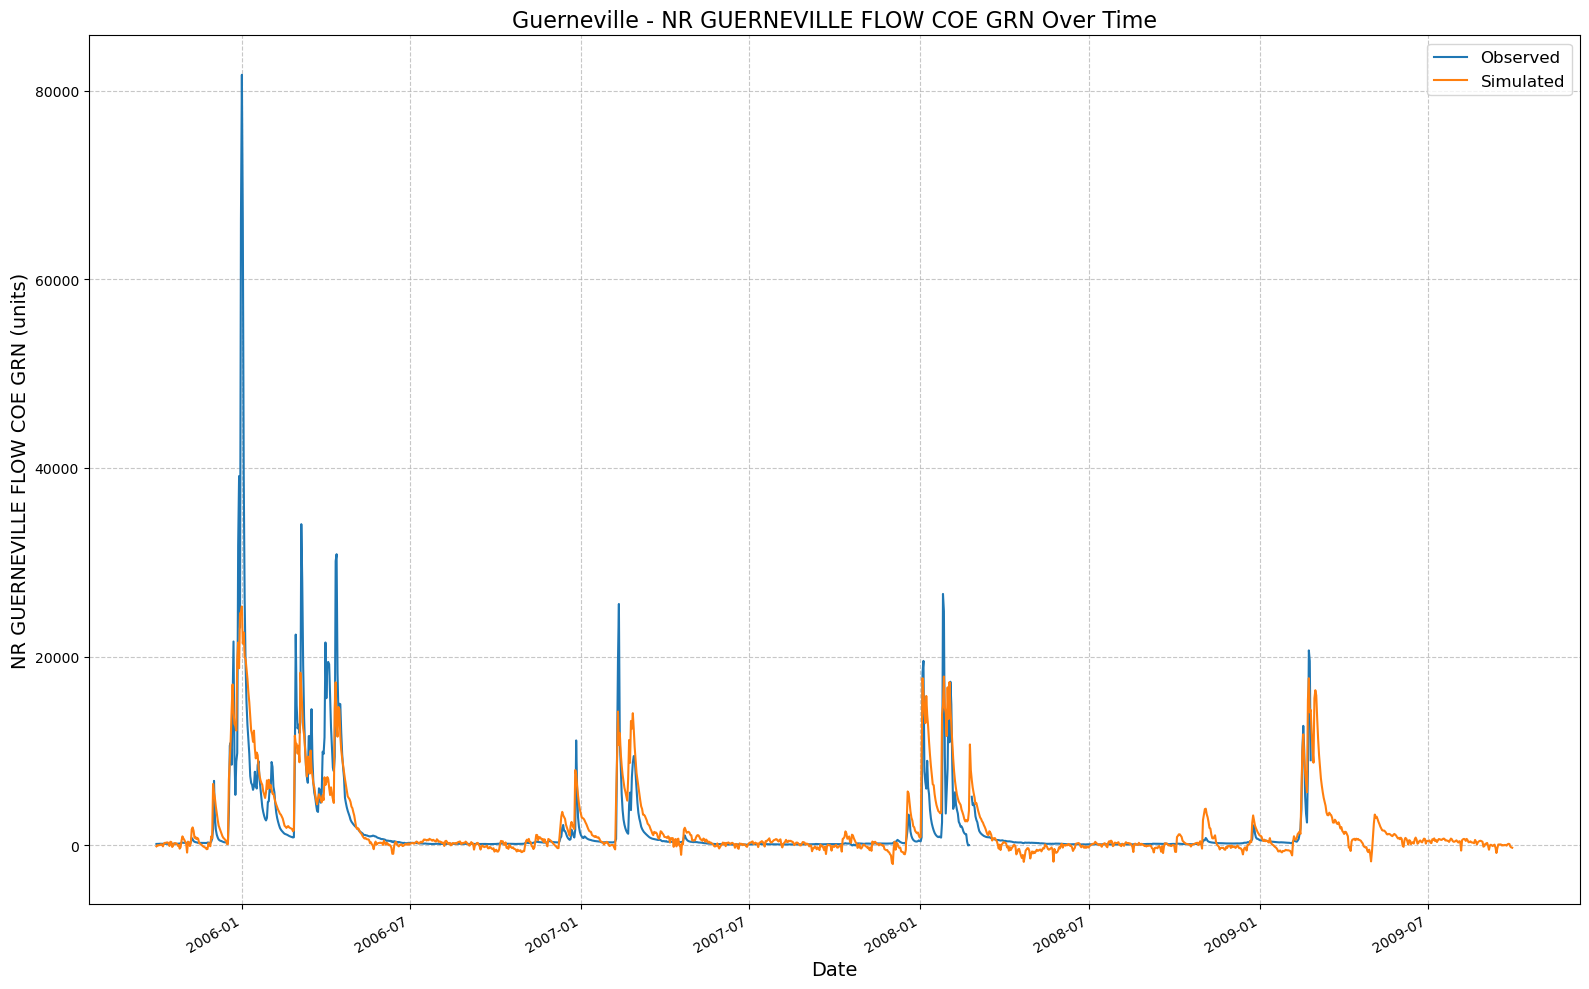

[INFO] CSV output saved at: /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/guerneville_all/runs/testing_run_3011_092941/results_output.csv


{'NSE': 0.6461572349071503,
 'MSE': 10899746.0,
 'RMSE': 3301.4763364289015,
 'KGE': 0.6636816727297647,
 'Alpha-NSE': 0.72378114677054,
 'Beta-KGE': 1.0072938203811646,
 'Beta-NSE': 0.0025539806388292507,
 'Pearson-r': 0.8082711222515023,
 'FHV': -38.820937275886536,
 'FMS': 118.01812749183094,
 'FLV': 91.94437420797989,
 'Peak-Timing': 0.75,
 'Peak-MAPE': 48.93300533294678}

In [5]:
lstmNoPhysics.results()

Now run physics informed lstm with HMS data:

In [14]:
path_to_csv = Path("/Users/mia/research/russian_river_data_folder/")
path_to_yaml = Path("guerneville_gage.yaml")
path_to_physics_data = Path("/Users/mia/research/russian_river_data_folder/guerneville.csv")
params = {
    "epochs":32
}
features_with_physics = [
    #from daily.csv
    "BIG SULPHUR CR ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "DRY CREEK 10 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "EF RUSSIAN 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "GREEN VALLEY ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "LAGUNA ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 30 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 40 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 50 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 60 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 70 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "SANTA ROSA CR 10 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "SANTA ROSA CR 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "WF RUSSIAN ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "BIG SULPHUR CR PRECIP-INC SCREENED",
    "DRY CREEK 10 PRECIP-INC SCREENED",
    "EF RUSSIAN 20 PRECIP-INC SCREENED",
    "GREEN VALLEY PRECIP-INC SCREENED",
    "LAGUNA PRECIP-INC SCREENED",
    "RUSSIAN 20 PRECIP-INC SCREENED",
    "RUSSIAN 30 PRECIP-INC SCREENED",
    "RUSSIAN 40 PRECIP-INC SCREENED",
    "RUSSIAN 50 PRECIP-INC SCREENED",
    "RUSSIAN 60 PRECIP-INC SCREENED",
    "RUSSIAN 70 PRECIP-INC SCREENED",
    "SANTA ROSA CR 10 PRECIP-INC SCREENED",
    "SANTA ROSA CR 20 PRECIP-INC SCREENED",
    "WF RUSSIAN PRECIP-INC SCREENED",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    "SANTA ROSA CA HUMIDITY USAF-NOAA",
    "SANTA ROSA CA SOLAR RADIATION USAF-NOAA",
    "SANTA ROSA CA TEMPERATURE USAF-NOAA",
    "SANTA ROSA CA WINDSPEED USAF-NOAA",
    "UKIAH CA FLOW USGS-MERGED",
    "GEYSERVILLE CA FLOW USGS-MERGED",
    #from guerneville.csv
    'Guerneville Gage FLOW Guerneville',
    'Big Sulphur Cr ET-POTENTIAL Guerneville',
    'Big Sulphur Cr FLOW Guerneville',
    'Big Sulphur Cr FLOW-BASE Guerneville',
    'Big Sulphur Cr INFILTRATION Guerneville',
    'Big Sulphur Cr PERC-SOIL Guerneville',
    'Big Sulphur Cr SATURATION FRACTION Guerneville',
    'Dry Creek 10 ET-POTENTIAL Guerneville',
    'Dry Creek 10 FLOW Guerneville', 'Dry Creek 10 FLOW-BASE Guerneville',
    'Dry Creek 10 INFILTRATION Guerneville',
    'Dry Creek 10 PERC-SOIL Guerneville',
    'Dry Creek 10 SATURATION FRACTION Guerneville',
    'Green Valley ET-POTENTIAL Guerneville',
    'Green Valley FLOW Guerneville', 'Green Valley FLOW-BASE Guerneville',
    'Green Valley INFILTRATION Guerneville',
    'Green Valley PERC-SOIL Guerneville',
    'Green Valley SATURATION FRACTION Guerneville',
    'Laguna ET-POTENTIAL Guerneville', 'Laguna FLOW Guerneville',
    'Laguna FLOW-BASE Guerneville', 'Laguna INFILTRATION Guerneville',
    'Laguna PERC-SOIL Guerneville',
    'Laguna SATURATION FRACTION Guerneville',
    'Russian 20 ET-POTENTIAL Guerneville', 'Russian 20 FLOW Guerneville',
    'Russian 20 FLOW-BASE Guerneville',
    'Russian 20 INFILTRATION Guerneville',
    'Russian 20 PERC-SOIL Guerneville',
    'Russian 20 SATURATION FRACTION Guerneville',
    'Russian 30 ET-POTENTIAL Guerneville', 'Russian 30 FLOW Guerneville',
    'Russian 30 FLOW-BASE Guerneville',
    'Russian 30 INFILTRATION Guerneville',
    'Russian 30 PERC-SOIL Guerneville',
    'Russian 30 SATURATION FRACTION Guerneville',
    'Russian 40 ET-POTENTIAL Guerneville', 'Russian 40 FLOW Guerneville',
    'Russian 40 FLOW-BASE Guerneville',
    'Russian 40 INFILTRATION Guerneville',
    'Russian 40 PERC-SOIL Guerneville',
    'Russian 40 SATURATION FRACTION Guerneville',
    'Russian 50 ET-POTENTIAL Guerneville', 'Russian 50 FLOW Guerneville',
    'Russian 50 FLOW-BASE Guerneville',
    'Russian 50 INFILTRATION Guerneville',
    'Russian 50 PERC-SOIL Guerneville',
    'Russian 50 SATURATION FRACTION Guerneville',
    'Russian 60 ET-POTENTIAL Guerneville', 'Russian 60 FLOW Guerneville',
    'Russian 60 FLOW-BASE Guerneville',
    'Russian 60 INFILTRATION Guerneville',
    'Russian 60 PERC-SOIL Guerneville',
    'Russian 60 SATURATION FRACTION Guerneville',
    'Russian 70 ET-POTENTIAL Guerneville', 'Russian 70 FLOW Guerneville',
    'Russian 70 FLOW-BASE Guerneville',
    'Russian 70 INFILTRATION Guerneville',
    'Russian 70 PERC-SOIL Guerneville',
    'Russian 70 SATURATION FRACTION Guerneville',
    'Santa Rosa Cr 10 ET-POTENTIAL Guerneville',
    'Santa Rosa Cr 10 FLOW Guerneville',
    'Santa Rosa Cr 10 FLOW-BASE Guerneville',
    'Santa Rosa Cr 10 INFILTRATION Guerneville',
    'Santa Rosa Cr 10 PERC-SOIL Guerneville',
    'Santa Rosa Cr 10 SATURATION FRACTION Guerneville',
    'Santa Rosa Cr 20 ET-POTENTIAL Guerneville',
    'Santa Rosa Cr 20 FLOW Guerneville',
    'Santa Rosa Cr 20 FLOW-BASE Guerneville',
    'Santa Rosa Cr 20 INFILTRATION Guerneville',
    'Santa Rosa Cr 20 PERC-SOIL Guerneville',
    'Santa Rosa Cr 20 SATURATION FRACTION Guerneville',
    'WF Russian ET-POTENTIAL Guerneville', 'WF Russian FLOW Guerneville',
    ]
lstmPhysics = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data)

In [15]:
lstmPhysics.train()

2024-11-30 10:22:23,253: Logging to /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/guerneville_all/runs/testing_run_3011_102223/output.log initialized.
2024-11-30 10:22:23,275: ### Folder structure created at /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/guerneville_all/runs/testing_run_3011_102223
2024-11-30 10:22:23,277: ### Run configurations for testing_run
2024-11-30 10:22:23,281: experiment_name: testing_run
2024-11-30 10:22:23,283: train_basin_file: guerneville
2024-11-30 10:22:23,285: validation_basin_file: guerneville
2024-11-30 10:22:23,287: test_basin_file: guerneville
2024-11-30 10:22:23,291: train_start_date: 1994-10-01 00:00:00
2024-11-30 10:22:23,292: train_end_date: 2002-09-30 00:00:00
2024-11-30 10:22:23,299: validation_start_date: 2002-10-01 00:00:00
2024-11-30 10:22:23,303: validation_end_date: 2005-09-30 00:00:00
2024-11-30 10:22:23,305: test_start_date: 2005-10-01 00:00:00
2024-11-30 10:22:23,307: test_end_date: 2009-09-30 00:00:00
2024-11-30 10:22:23,30

Using basin: Guerneville
Using target variable: NR GUERNEVILLE FLOW COE GRN


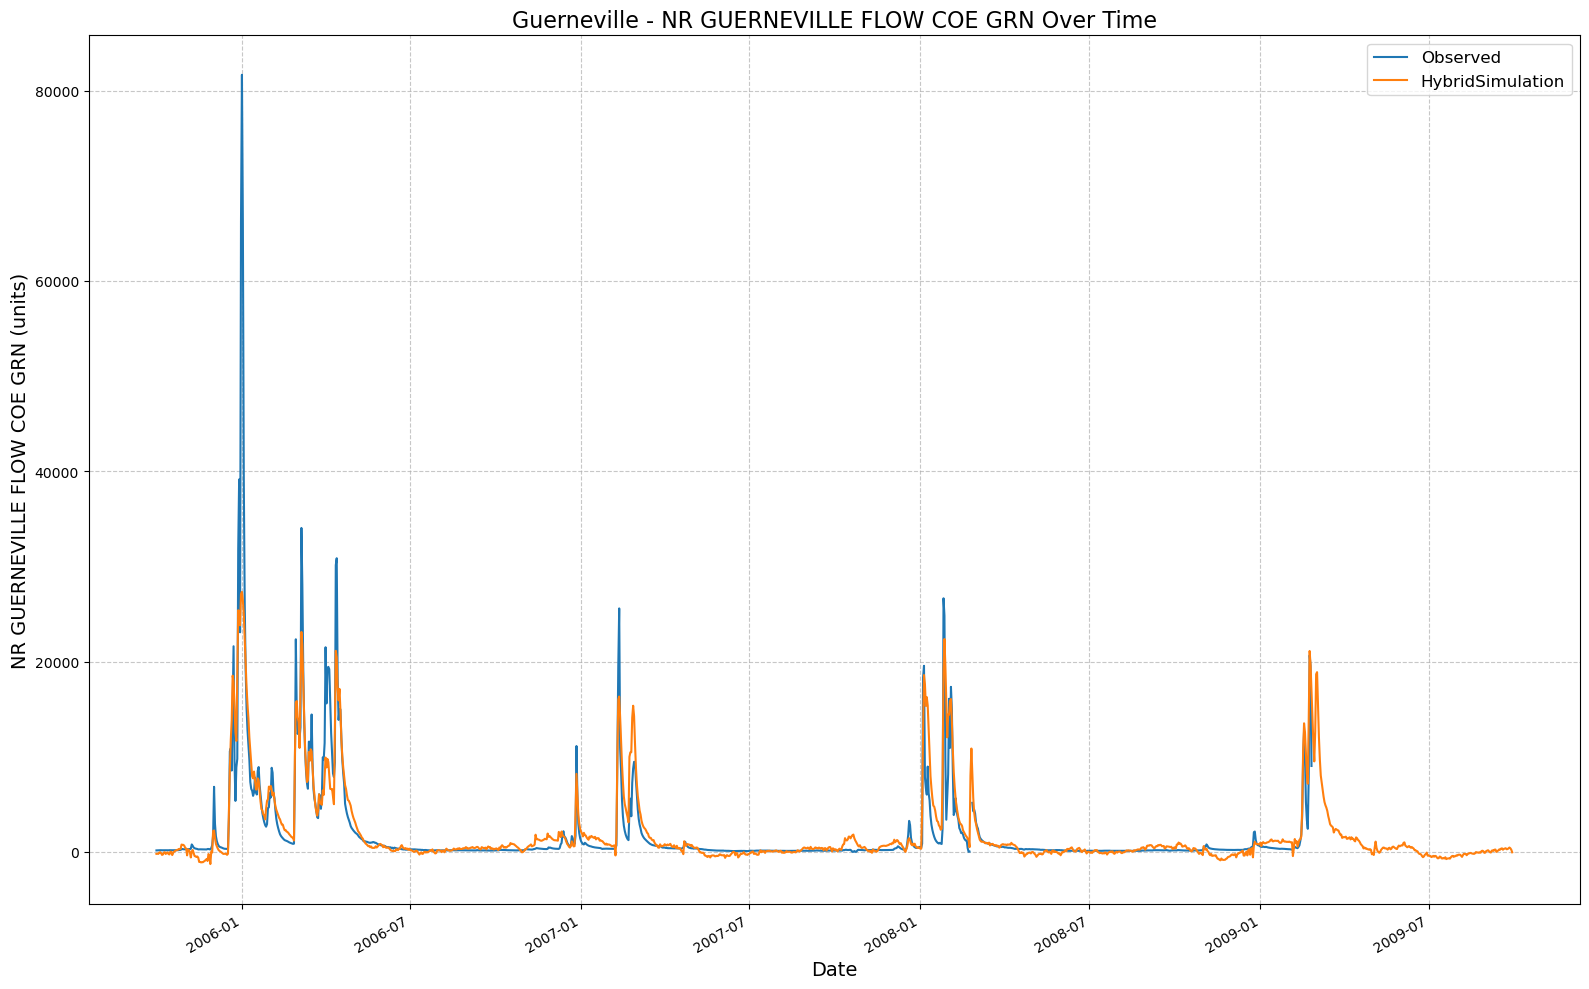

[INFO] CSV output saved at: /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/guerneville_all/runs/testing_run_3011_102223/results_output.csv


{'NSE': 0.739246666431427,
 'MSE': 8032226.5,
 'RMSE': 2834.1182932263077,
 'KGE': 0.7328105183493279,
 'Alpha-NSE': 0.7721733405075261,
 'Beta-KGE': 1.0349745750427246,
 'Beta-NSE': 0.012246552815653629,
 'Pearson-r': 0.864862990155043,
 'FHV': -31.013882160186768,
 'FMS': 32.35107269517907,
 'FLV': 72.54836554517365,
 'Peak-Timing': 0.5,
 'Peak-MAPE': 33.57081651687622}

In [16]:
lstmPhysics.results()

Now, combine the results for the normal lstm, physics informed lstm and the hms results on one graph over a specified time period (the test period).

In [9]:
import xarray as xr

In [ ]:
def combinedPlot(lstm_results: Path, lstmPhysics_results: Path, HMS_results: Path, title: str, 
                 test_start_date="01/10/2005", test_end_date="30/09/2009"):
    model1_df = pd.read_csv(lstm_results) #colums: Date, Observed, Predicted
    model2_df = pd.read_csv(lstmPhysics_results) #colums: Date, Observed, Predicted
    model1_df = model1_df.rename(columns={
        'Date': 'date',
        'Observed': 'Observed_Model1',
        'Predicted': 'Predicted_Model1'
    })
    model1_df['date'] = pd.to_datetime(model1_df['date'])

    # Set all negative values in the Predicted_Model1 column to zero
    model1_df.loc[model1_df['Predicted_Model1'] < 0, 'Predicted_Model1'] = 0

    model2_df = model2_df.rename(columns={
        'Date': 'date',
        'Observed': 'Observed_Model2',
        'Predicted': 'Predicted_Model2'
    })
    model2_df['date'] = pd.to_datetime(model2_df['date'])

    # Set all negative values in the Predicted_Model2 column to zero
    model2_df.loc[model2_df['Predicted_Model2'] < 0, 'Predicted_Model2'] = 0
    
    #This just gets the HMS prediceted values from the physics csv
    hms_df = pd.read_csv(HMS_results)
    hms_df = hms_df[3:]
    hms_df.columns = hms_df.columns.str.strip()
    hms_df = hms_df.drop(columns=['Ordinate'])
    hms_df = hms_df.rename(columns={'Date / Time': 'date'})
    hms_df['date'] = pd.to_datetime(hms_df['date'], format='%d-%b-%y')
    hms_df = hms_df.reset_index(drop=True)
    hms_df = hms_df.iloc[:, [0,1]] #Date, HMS predicted
    hms_df = hms_df.rename(columns={hms_df.columns[1]: "HMS_predicted"})
    hms_df["HMS_predicted"] = pd.to_numeric(hms_df["HMS_predicted"], errors="coerce")

    df = model1_df.merge(model2_df, how='right', on='date').merge(hms_df, how='right', on='date')

    # Filter for the test period
    test_start_date = pd.to_datetime("2005-10-01")
    test_end_date = pd.to_datetime("2009-09-30")
    df = df[(df['date'] >= test_start_date) & (df['date'] <= test_end_date)]

    # Convert pandas Series to xarray DataArray with a datetime coordinate
    obs_da = xr.DataArray(df['Observed_Model1'].values, dims=["date"], coords={"date": df['date']})
    sim_da_hms = xr.DataArray(df['HMS_predicted'].values, dims=["date"], coords={"date": df['date']})
    sim_da_lstm = xr.DataArray(df['Predicted_Model1'].values, dims=["date"], coords={"date": df['date']})
    sim_da_physics = xr.DataArray(df['Predicted_Model2'].values, dims=["date"], coords={"date": df['date']})

    # Collect metrics into a dictionary
    metrics = {
        "HMS": calculate_all_metrics(obs_da, sim_da_hms),
        "LSTM": calculate_all_metrics(obs_da, sim_da_lstm),
        "Physics_Informed_LSTM": calculate_all_metrics(obs_da, sim_da_physics),
    }

    metrics_df = pd.DataFrame(metrics)
    output_csv_path = "guerneville_metrics.csv"
    metrics_df.to_csv(output_csv_path)

    # Plot all columns against the "date_col" (x-axis)
    plt.figure(figsize=(30, 10))
    
    plt.plot(df["date"], df["Observed_Model1"], label='Observed', linewidth=2)
    plt.plot(df["date"], df["HMS_predicted"], label='HMS Prediction',  linewidth=2, alpha=0.7)
    plt.plot(df["date"], df["Predicted_Model1"], label='LSTM Prediction', linewidth=2, alpha=0.8)
    plt.plot(df["date"], df["Predicted_Model2"], label='Physics Informed LSTM Prediction', linewidth=2, alpha=0.7)
    
    # Customize the plot
    plt.tick_params(axis='x', labelsize=15)  # For x-axis tick labels
    plt.tick_params(axis='y', labelsize=15) 
    plt.xlabel("Date", fontsize=20)
    plt.ylabel("Inflow (cubic feet per second)", fontsize=20)
    plt.title(title, fontsize=30)
    plt.legend(fontsize=25, loc="upper right")
    plt.grid(True, alpha=0.4)

    plt.xlim(test_start_date, test_end_date)

    #plt.gcf.autofmt_xdate()
    plt.tight_layout()
    plt.show()

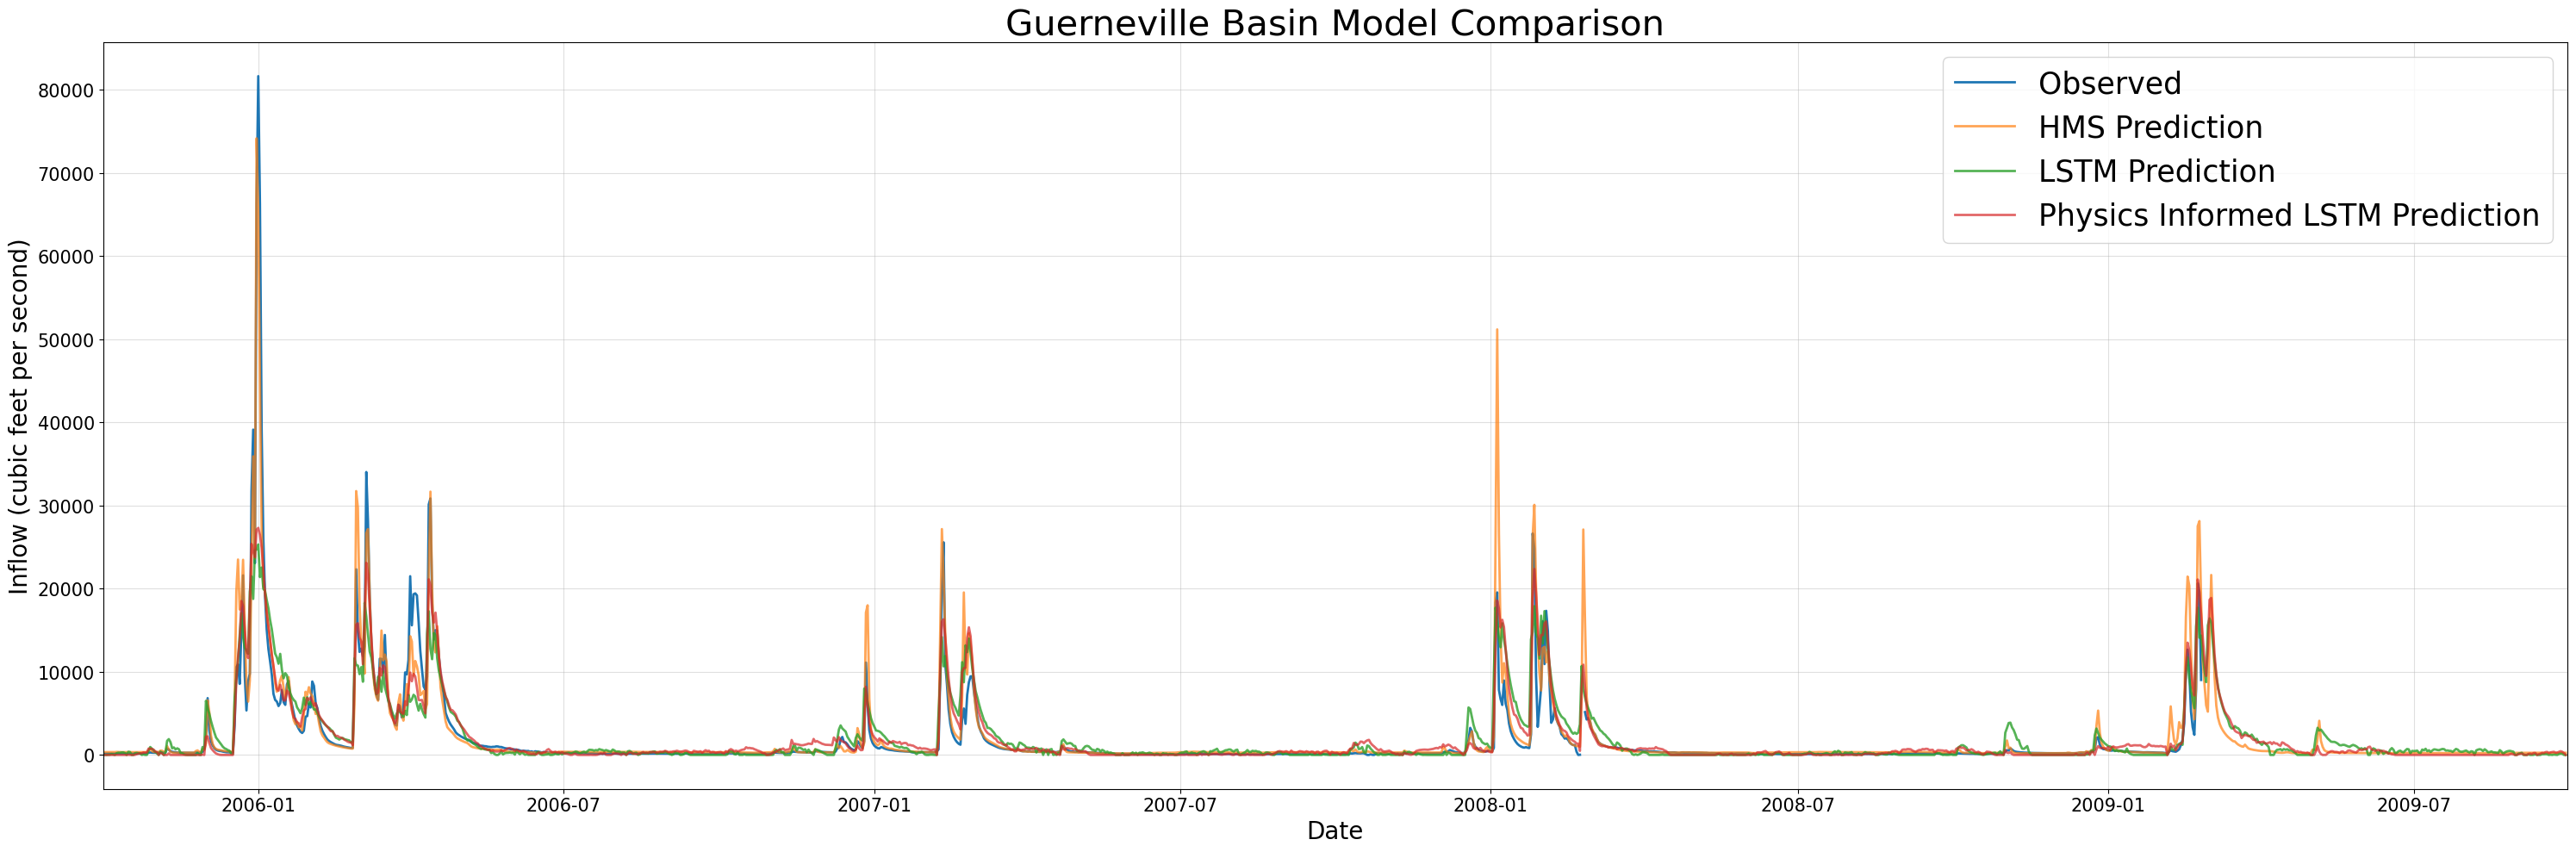

In [ ]:
#change the paths to the respective ouptut csvs from running the result method
lstm_result_path = Path('/Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/guerneville_all/runs/testing_run_3011_092941/results_output.csv')
physics_informed_result_path = Path('/Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/guerneville_all/runs/testing_run_3011_102223/results_output.csv')
path_to_physics_data = Path("/Users/mia/research/russian_river_data_folder/guerneville.csv")
combinedPlot(lstm_results=lstm_result_path, lstmPhysics_results= physics_informed_result_path, HMS_results=path_to_physics_data, title='Guerneville Basin Model Comparison')